In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Load dataset
data = pd.read_csv("breast-cancer.csv")

In [3]:
# Encode target variable
data["diagnosis"] = LabelEncoder().fit_transform(data["diagnosis"])  # M=1, B=0

In [4]:
# Features and labels
X = data.drop(["id", "diagnosis"], axis=1)
y = data["diagnosis"]

In [5]:
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [10]:
# 1. Train SVM with Linear Kernel
linear_svm = SVC(kernel='linear', C=1)
linear_svm.fit(X_train, y_train)
y_pred_linear = linear_svm.predict(X_test)
print("\nLinear Kernel Results:")
print(classification_report(y_test, y_pred_linear))


Linear Kernel Results:
              precision    recall  f1-score   support

           0       0.97      0.96      0.96        71
           1       0.93      0.95      0.94        43

    accuracy                           0.96       114
   macro avg       0.95      0.96      0.95       114
weighted avg       0.96      0.96      0.96       114



In [12]:
# 2. Train SVM with RBF Kernel
rbf_svm = SVC(kernel='rbf', C=1, gamma=0.01)
rbf_svm.fit(X_train, y_train)
y_pred_rbf = rbf_svm.predict(X_test)
print("\nRBF Kernel Results:")
print(classification_report(y_test, y_pred_rbf))


RBF Kernel Results:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [13]:
# 3. Hyperparameter Tuning with GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'gamma': [0.01, 0.001], 'kernel': ['rbf']}
grid = GridSearchCV(SVC(), param_grid, refit=True, cv=5)
grid.fit(X_train, y_train)
print("\nBest Parameters:", grid.best_params_)
print("Best Cross-validation Score:", grid.best_score_)


Best Parameters: {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
Best Cross-validation Score: 0.9736263736263737


In [14]:
# 4. Cross-validation
scores = cross_val_score(grid.best_estimator_, X_scaled, y, cv=5)
print("\nCross-validation scores:", scores)
print("Mean CV Accuracy:", scores.mean())


Cross-validation scores: [0.97368421 0.97368421 0.98245614 0.97368421 0.99115044]
Mean CV Accuracy: 0.9789318428815401


In [15]:
# 5. Visualization using PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [16]:
# Train SVM on reduced 2D data
svm_2d = SVC(kernel='rbf', C=1, gamma=0.01)
svm_2d.fit(X_pca, y)

SVC(C=1, gamma=0.01)

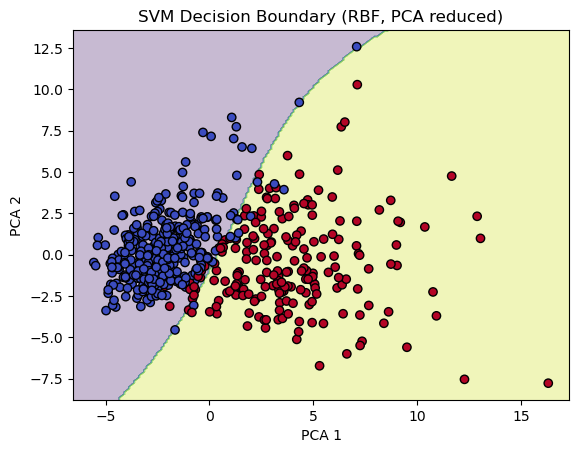

In [17]:
# Plot decision boundary
def plot_decision_boundary(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.title('SVM Decision Boundary (RBF, PCA reduced)')
    plt.show()

plot_decision_boundary(X_pca, y, svm_2d)